In [4]:
import yfinance as yf
import csv
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.patches as mpatches
from matplotlib.dates import date2num, DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY

In [2]:
azn_df = yf.download("AZN.L", start="2010-01-01", end="2022-01-01")[['Adj Close','Open', 'High', 'Low', 'Close', 'Volume']].round(2)

[*********************100%***********************]  1 of 1 completed


In [3]:
azn_df

Adj Close    Open    High      Low   Close   Volume
Date                                                           
2009-12-31    1681.68  2913.5  2929.0  2892.00  2910.5   606488
2010-01-04    1699.30  2912.0  2946.0  2912.00  2941.0  2091679
2010-01-05    1679.94  2936.0  2949.5  2901.00  2907.5  2869739
2010-01-06    1661.16  2909.0  2909.0  2850.50  2875.0  3136541
2010-01-07    1681.68  2879.0  2925.5  2879.00  2910.5  3748200
...               ...     ...     ...      ...     ...      ...
2021-12-23    8457.35  8633.0  8653.0  8556.00  8596.0  1560376
2021-12-24    8472.10  8613.0  8676.0  8608.49  8611.0   234238
2021-12-29    8516.38  8657.0  8720.0  8651.55  8656.0  1406164
2021-12-30    8533.10  8649.0  8711.0  8630.00  8673.0   697022
2021-12-31    8538.02  8689.0  8704.0  8588.00  8678.0   482453

[3034 rows x 6 columns]

In [7]:
#series = read_csv('azn_df.csv', header=0, index_col=0)

NameError: name 'read_csv' is not defined

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas import read_csv
result = seasonal_decompose(azn_df, model='additive', period=1)
result.plot()
pyplot.show()

In [ ]:
data = pd.read_csv(azn_df, index_col='Date')

In [8]:
azn_df.index

DatetimeIndex(['2009-12-31', '2010-01-04', '2010-01-05', '2010-01-06',
               '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14',
               ...
               '2021-12-16', '2021-12-17', '2021-12-20', '2021-12-21',
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='Date', length=3034, freq=None)

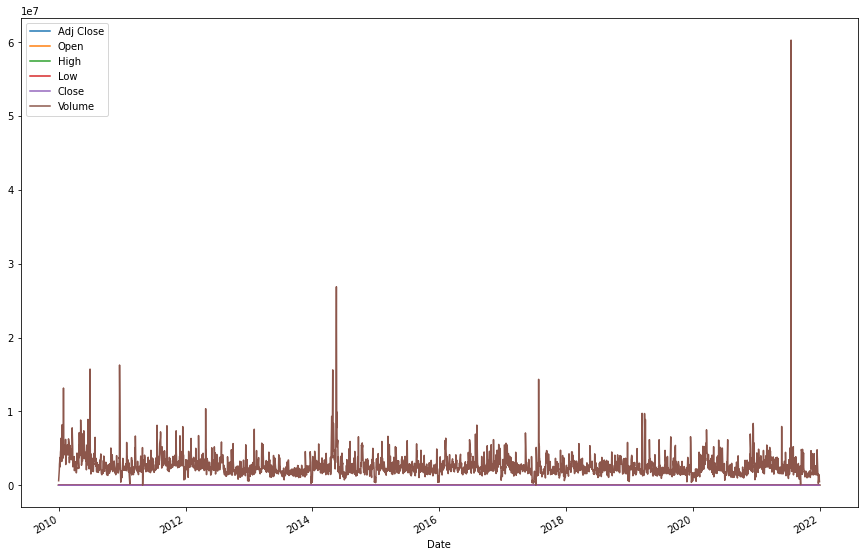

In [9]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)
azn_df.plot()
plt.show()

In [10]:
azn_df.to_csv('azn1.csv')

In [11]:
#from matplotlib import pyplot
#from statsmodels.tsa.seasonal import seasonal_decompose
#series = read_csv('azn1.csv', header=0, index_col='Date')
#result = seasonal_decompose(series, model='multiplicative')
#result.plot()
#pyplot.show()

In [1]:
#decomposition = seasonal_decompose(azn_df['Open'],   model='multipitive', 
                                  # period=30)
#decomposition.plot();
                                 

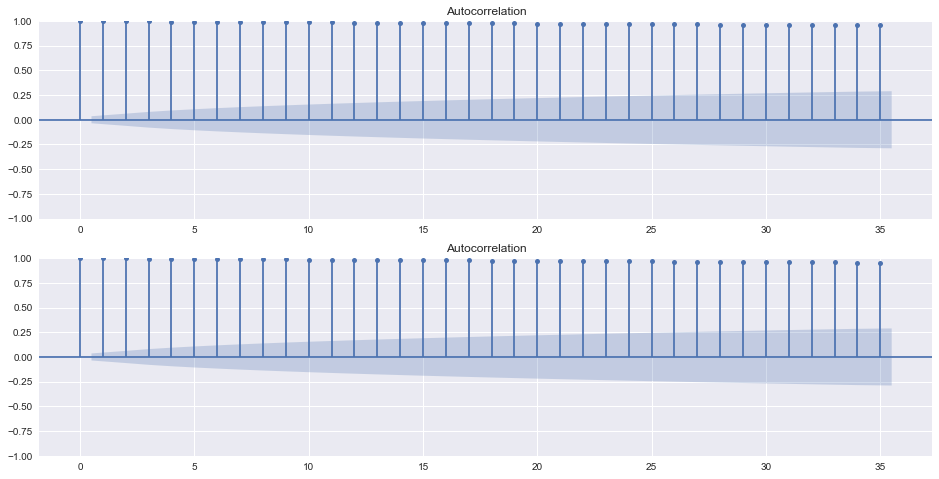

In [25]:

import statsmodels.api as sm
fig, ax = plt.subplots(2)
sm.graphics.tsa.plot_acf(azn_df['Adj Close'], ax=ax[0])
sm.graphics.tsa.plot_acf(azn_df['Adj Close'], ax=ax[1]);

In [ ]:
def stationarity_test(stock_close_price):
    # Calculating rolling mean and rolling standard deviation:
    rolling_mean = stock_close_price.rolling(30).mean()
    rolling_std_dev = stock_close_price.rolling(30).std()
  
    # Plotting the statistics:
    plt.figure(figsize=(24,6))
    plt.plot(rolling_mean, color='blue', label='Rolling Mean')
    plt.plot(rolling_std_dev, color='green', label = 'Rolling Std Dev')
    plt.plot(stock_close_price, color='red',label='Original Time Series')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    
    print("ADF Test:")
    adf_test = adfuller(stock_close_price,autolag='AIC')
    print('Null Hypothesis: Not Stationary')
    print('ADF Statistic: %f' % adf_test[0])
    print('p-value: %f' % adf_test[1])
    print('Critical Values:')
    for key, value in adf_test[4].items():
        print('\t%s: %.3f' % (key, value))

    
    
stationarity_test(azn_df['Close'])

In [ ]:
decomposition.trend

In [13]:
decomposition.seasonal

NameError: name 'decomposition' is not defined

<AxesSubplot:xlabel='Date'>

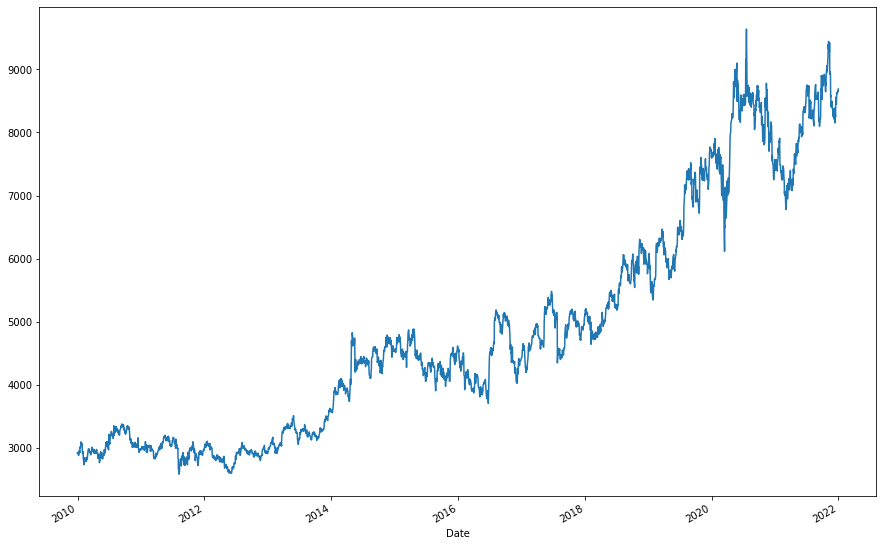

In [14]:
#azn_df['Open'].plot()

In [26]:

from datetime import datetime

# stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot

# plotting
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt

In [27]:
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (16, 8)

In [28]:
azn_df = azn_df.reset_index(level=0)

In [29]:
azn_df['month'] = pd.DatetimeIndex(azn_df['Date']).month

In [30]:
azn_df

index       Date  Adj Close    Open    High      Low   Close   Volume  \
0         0 2009-12-31    1681.68  2913.5  2929.0  2892.00  2910.5   606488   
1         1 2010-01-04    1699.30  2912.0  2946.0  2912.00  2941.0  2091679   
2         2 2010-01-05    1679.94  2936.0  2949.5  2901.00  2907.5  2869739   
3         3 2010-01-06    1661.16  2909.0  2909.0  2850.50  2875.0  3136541   
4         4 2010-01-07    1681.68  2879.0  2925.5  2879.00  2910.5  3748200   
...     ...        ...        ...     ...     ...      ...     ...      ...   
3029   3029 2021-12-23    8457.35  8633.0  8653.0  8556.00  8596.0  1560376   
3030   3030 2021-12-24    8472.10  8613.0  8676.0  8608.49  8611.0   234238   
3031   3031 2021-12-29    8516.38  8657.0  8720.0  8651.55  8656.0  1406164   
3032   3032 2021-12-30    8533.10  8649.0  8711.0  8630.00  8673.0   697022   
3033   3033 2021-12-31    8538.02  8689.0  8704.0  8588.00  8678.0   482453   

      month  year   Open2  
0        12  2009  2913.5  
1         1  2010  2912.0  
2         1  2010  2936.0  
3         1  2010  2909.0  
4         1  2010  2879.0  
...     ...   ...     ...  
3029     12  2021  8633.0  
3030     12  2021  8613.0  
3031     12  2021  8657.0  
3032     12  2021  8649.0  
3033     12  2021  8689.0  

[3034 rows x 11 columns]

In [31]:
azn_df['year'] = pd.DatetimeIndex(azn_df['Date']).year

In [32]:
azn_df

index       Date  Adj Close    Open    High      Low   Close   Volume  \
0         0 2009-12-31    1681.68  2913.5  2929.0  2892.00  2910.5   606488   
1         1 2010-01-04    1699.30  2912.0  2946.0  2912.00  2941.0  2091679   
2         2 2010-01-05    1679.94  2936.0  2949.5  2901.00  2907.5  2869739   
3         3 2010-01-06    1661.16  2909.0  2909.0  2850.50  2875.0  3136541   
4         4 2010-01-07    1681.68  2879.0  2925.5  2879.00  2910.5  3748200   
...     ...        ...        ...     ...     ...      ...     ...      ...   
3029   3029 2021-12-23    8457.35  8633.0  8653.0  8556.00  8596.0  1560376   
3030   3030 2021-12-24    8472.10  8613.0  8676.0  8608.49  8611.0   234238   
3031   3031 2021-12-29    8516.38  8657.0  8720.0  8651.55  8656.0  1406164   
3032   3032 2021-12-30    8533.10  8649.0  8711.0  8630.00  8673.0   697022   
3033   3033 2021-12-31    8538.02  8689.0  8704.0  8588.00  8678.0   482453   

      month  year   Open2  
0        12  2009  2913.5  
1         1  2010  2912.0  
2         1  2010  2936.0  
3         1  2010  2909.0  
4         1  2010  2879.0  
...     ...   ...     ...  
3029     12  2021  8633.0  
3030     12  2021  8613.0  
3031     12  2021  8657.0  
3032     12  2021  8649.0  
3033     12  2021  8689.0  

[3034 rows x 11 columns]

In [33]:
azn_df['Open2'] = (azn_df['Open'])

In [34]:
azn_df


index       Date  Adj Close    Open    High      Low   Close   Volume  \
0         0 2009-12-31    1681.68  2913.5  2929.0  2892.00  2910.5   606488   
1         1 2010-01-04    1699.30  2912.0  2946.0  2912.00  2941.0  2091679   
2         2 2010-01-05    1679.94  2936.0  2949.5  2901.00  2907.5  2869739   
3         3 2010-01-06    1661.16  2909.0  2909.0  2850.50  2875.0  3136541   
4         4 2010-01-07    1681.68  2879.0  2925.5  2879.00  2910.5  3748200   
...     ...        ...        ...     ...     ...      ...     ...      ...   
3029   3029 2021-12-23    8457.35  8633.0  8653.0  8556.00  8596.0  1560376   
3030   3030 2021-12-24    8472.10  8613.0  8676.0  8608.49  8611.0   234238   
3031   3031 2021-12-29    8516.38  8657.0  8720.0  8651.55  8656.0  1406164   
3032   3032 2021-12-30    8533.10  8649.0  8711.0  8630.00  8673.0   697022   
3033   3033 2021-12-31    8538.02  8689.0  8704.0  8588.00  8678.0   482453   

      month  year   Open2  
0        12  2009  2913.5  
1         1  2010  2912.0  
2         1  2010  2936.0  
3         1  2010  2909.0  
4         1  2010  2879.0  
...     ...   ...     ...  
3029     12  2021  8633.0  
3030     12  2021  8613.0  
3031     12  2021  8657.0  
3032     12  2021  8649.0  
3033     12  2021  8689.0  

[3034 rows x 11 columns]

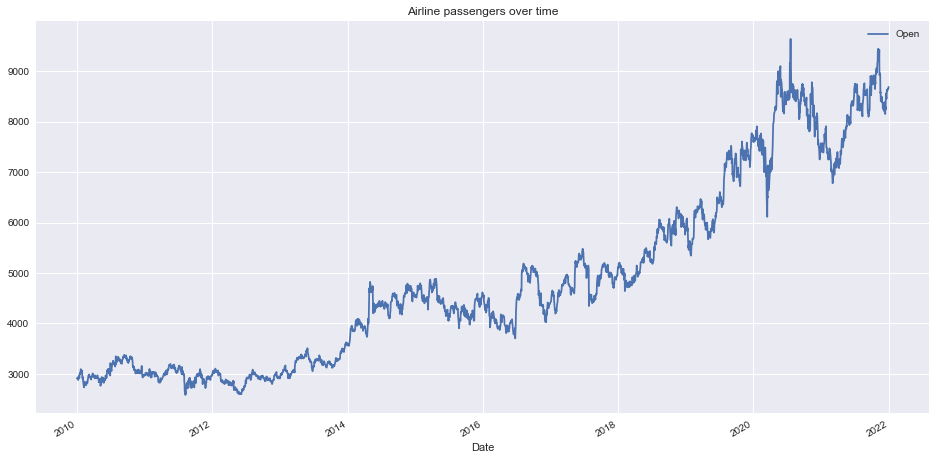

In [35]:
azn_df.plot(x='Date', 
             y='Open', 
             title='Airline passengers over time');

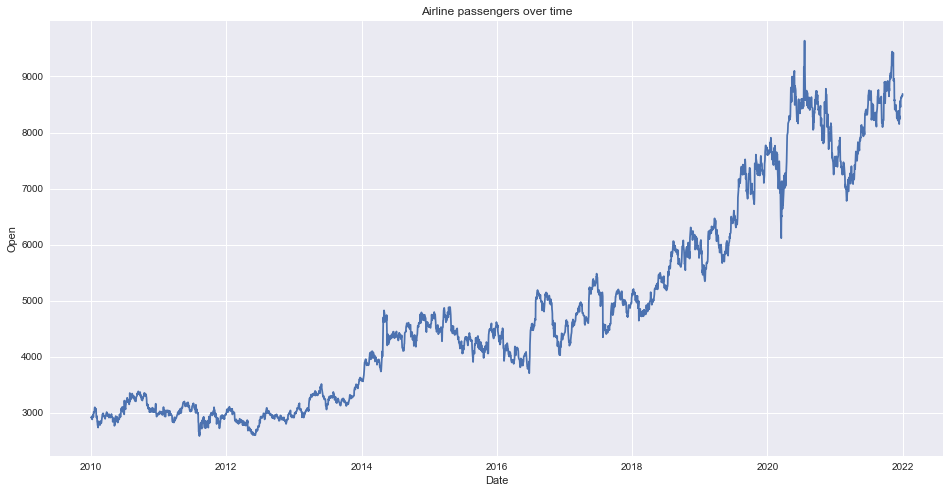

In [36]:
sns.lineplot(data=azn_df, 
             x='Date', 
             y='Open').set_title('Airline passengers over time');

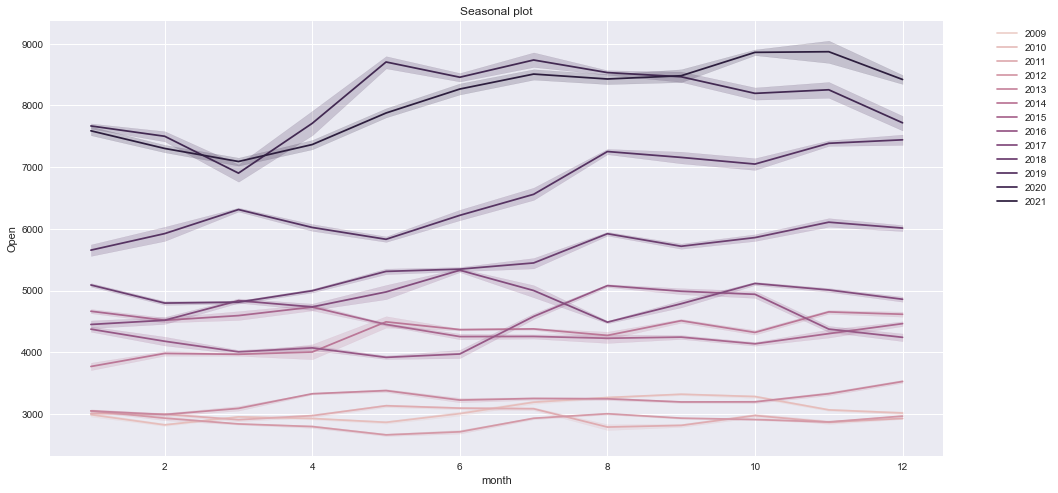

In [37]:
sns.lineplot(data=azn_df, 
             x='month', 
             y='Open', 
             hue='year', 
             legend='full')

# add title
plt.title('Seasonal plot')

# move the legend outside of the main figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

In [38]:
aq = azn_df.set_index("Date")
aq

index  Adj Close    Open    High      Low   Close   Volume  month  \
Date                                                                            
2009-12-31      0    1681.68  2913.5  2929.0  2892.00  2910.5   606488     12   
2010-01-04      1    1699.30  2912.0  2946.0  2912.00  2941.0  2091679      1   
2010-01-05      2    1679.94  2936.0  2949.5  2901.00  2907.5  2869739      1   
2010-01-06      3    1661.16  2909.0  2909.0  2850.50  2875.0  3136541      1   
2010-01-07      4    1681.68  2879.0  2925.5  2879.00  2910.5  3748200      1   
...           ...        ...     ...     ...      ...     ...      ...    ...   
2021-12-23   3029    8457.35  8633.0  8653.0  8556.00  8596.0  1560376     12   
2021-12-24   3030    8472.10  8613.0  8676.0  8608.49  8611.0   234238     12   
2021-12-29   3031    8516.38  8657.0  8720.0  8651.55  8656.0  1406164     12   
2021-12-30   3032    8533.10  8649.0  8711.0  8630.00  8673.0   697022     12   
2021-12-31   3033    8538.02  8689.0  8704.0  8588.00  8678.0   482453     12   

            year   Open2  
Date                      
2009-12-31  2009  2913.5  
2010-01-04  2010  2912.0  
2010-01-05  2010  2936.0  
2010-01-06  2010  2909.0  
2010-01-07  2010  2879.0  
...          ...     ...  
2021-12-23  2021  8633.0  
2021-12-24  2021  8613.0  
2021-12-29  2021  8657.0  
2021-12-30  2021  8649.0  
2021-12-31  2021  8689.0  

[3034 rows x 10 columns]

In [10]:
#aq.index = pd.DatetimeIndex(aq.index, freq='Y')

#month_plot(aq["Open"], ylabel='Passengers');

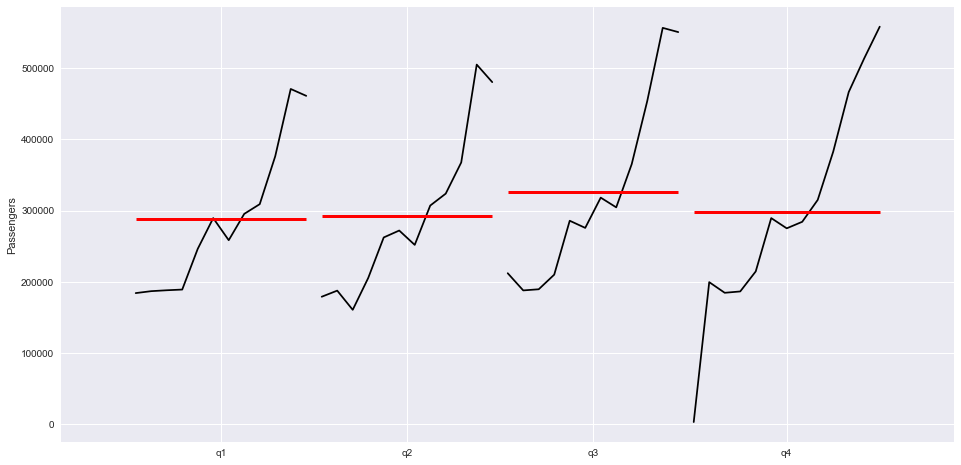

In [40]:
quarter_plot(aq["Close"].resample('Q').sum(), ylabel='Passengers');

In [109]:
azn_df['day'] = pd.DatetimeIndex(azn_df['Date']).day

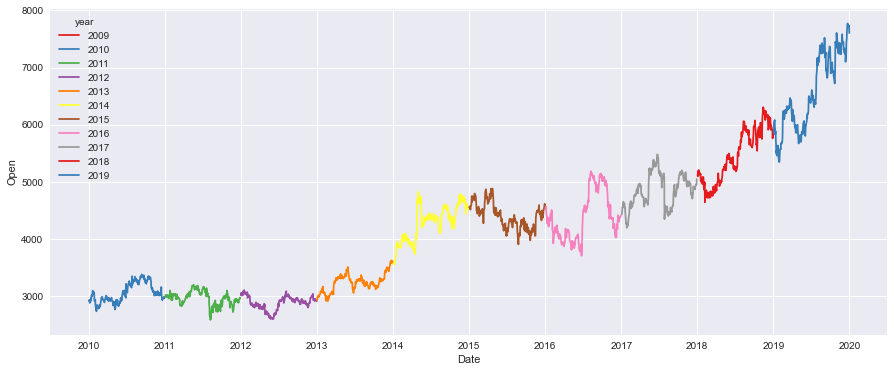

In [120]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Date',y='Open',data=azn_df,hue='year',palette='Set1')
plt.show()

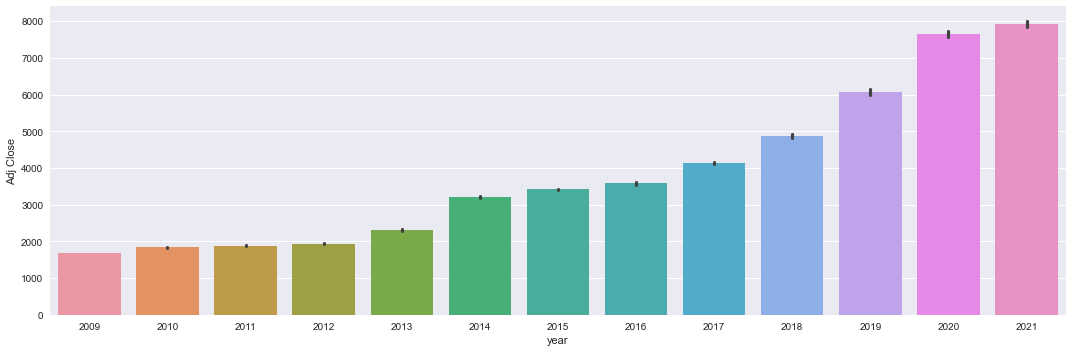

In [41]:
sns.catplot(x='year',y='Adj Close',data=azn_df,kind='bar',aspect=3)

In [133]:
azn_df['quarter'] = azn_df['Date'].dt.quarter
azn_df

Date  Adj Close    Open    High      Low   Close   Volume  month  \
0    2009-12-31    1681.68  2913.5  2929.0  2892.00  2910.5   606488     12   
1    2010-01-04    1699.30  2912.0  2946.0  2912.00  2941.0  2091679      1   
2    2010-01-05    1679.94  2936.0  2949.5  2901.00  2907.5  2869739      1   
3    2010-01-06    1661.16  2909.0  2909.0  2850.50  2875.0  3136541      1   
4    2010-01-07    1681.68  2879.0  2925.5  2879.00  2910.5  3748200      1   
...         ...        ...     ...     ...      ...     ...      ...    ...   
2522 2019-12-23    7210.13  7771.0  7824.0  7723.87  7746.0  2183949     12   
2523 2019-12-24    7180.35  7715.0  7794.0  7631.29  7714.0   378885     12   
2524 2019-12-27    7209.20  7706.0  7781.0  7641.00  7745.0   862283     12   
2525 2019-12-30    7124.50  7734.0  7767.0  7654.00  7654.0  1394124     12   
2526 2019-12-31    7080.75  7603.0  7630.0  7535.00  7607.0   576956     12   

      year   Open2  day  quarter  
0     2009  2913.5   31        4  
1     2010  2912.0    4        1  
2     2010  2936.0    5        1  
3     2010  2909.0    6        1  
4     2010  2879.0    7        1  
...    ...     ...  ...      ...  
2522  2019  7771.0   23        4  
2523  2019  7715.0   24        4  
2524  2019  7706.0   27        4  
2525  2019  7734.0   30        4  
2526  2019  7603.0   31        4  

[2527 rows x 12 columns]

In [136]:
#sales = azn_df[['Close','Date ','quarter']].groupby(by=['Date','quarter']).sum().values
#df_sales = pd.DataFrame(sales.reshape(9,4),index=list(range(2009,2020)),columns=           ['Q1','Q2','Q3','Q4'])

In [137]:
#fig,ax = plt.subplots(figsize=(15,6))
#azn_df.plot(kind='bar',ax=ax,stacked=True)
#plt.show()

In [138]:
azn_df

Date  Adj Close    Open    High      Low   Close   Volume  month  \
0    2009-12-31    1681.68  2913.5  2929.0  2892.00  2910.5   606488     12   
1    2010-01-04    1699.30  2912.0  2946.0  2912.00  2941.0  2091679      1   
2    2010-01-05    1679.94  2936.0  2949.5  2901.00  2907.5  2869739      1   
3    2010-01-06    1661.16  2909.0  2909.0  2850.50  2875.0  3136541      1   
4    2010-01-07    1681.68  2879.0  2925.5  2879.00  2910.5  3748200      1   
...         ...        ...     ...     ...      ...     ...      ...    ...   
2522 2019-12-23    7210.13  7771.0  7824.0  7723.87  7746.0  2183949     12   
2523 2019-12-24    7180.35  7715.0  7794.0  7631.29  7714.0   378885     12   
2524 2019-12-27    7209.20  7706.0  7781.0  7641.00  7745.0   862283     12   
2525 2019-12-30    7124.50  7734.0  7767.0  7654.00  7654.0  1394124     12   
2526 2019-12-31    7080.75  7603.0  7630.0  7535.00  7607.0   576956     12   

      year   Open2  day  quarter  
0     2009  2913.5   31        4  
1     2010  2912.0    4        1  
2     2010  2936.0    5        1  
3     2010  2909.0    6        1  
4     2010  2879.0    7        1  
...    ...     ...  ...      ...  
2522  2019  7771.0   23        4  
2523  2019  7715.0   24        4  
2524  2019  7706.0   27        4  
2525  2019  7734.0   30        4  
2526  2019  7603.0   31        4  

[2527 rows x 12 columns]

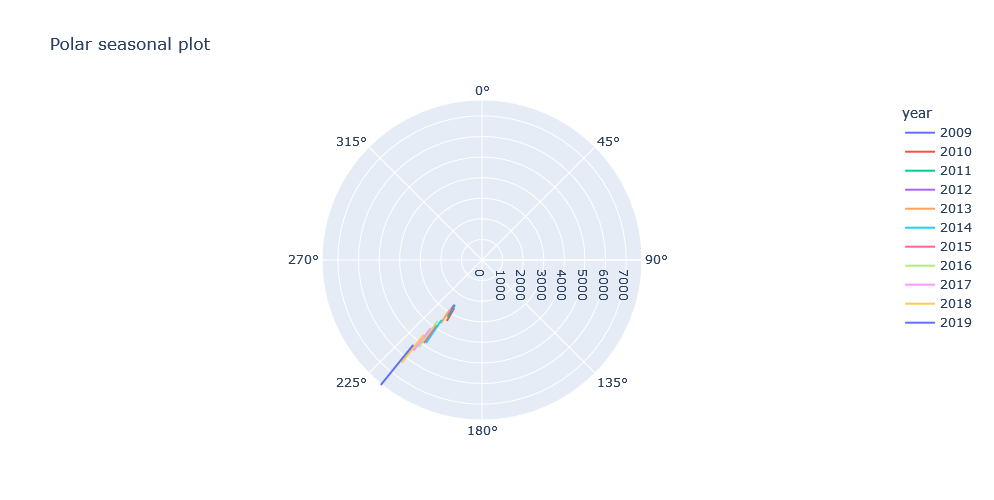

In [139]:
fig = px.line_polar(azn_df, r='Open', theta ='year', 
                    color='year', line_close=True, 
                    title='Polar seasonal plot',
                    width=600, height=500)
fig.show()

In [108]:
azn_df

Date  Adj Close    Open    High      Low   Close   Volume  month  \
0    2009-12-31    1681.68  2913.5  2929.0  2892.00  2910.5   606488     12   
1    2010-01-04    1699.30  2912.0  2946.0  2912.00  2941.0  2091679      1   
2    2010-01-05    1679.94  2936.0  2949.5  2901.00  2907.5  2869739      1   
3    2010-01-06    1661.16  2909.0  2909.0  2850.50  2875.0  3136541      1   
4    2010-01-07    1681.68  2879.0  2925.5  2879.00  2910.5  3748200      1   
...         ...        ...     ...     ...      ...     ...      ...    ...   
2522 2019-12-23    7210.13  7771.0  7824.0  7723.87  7746.0  2183949     12   
2523 2019-12-24    7180.35  7715.0  7794.0  7631.29  7714.0   378885     12   
2524 2019-12-27    7209.20  7706.0  7781.0  7641.00  7745.0   862283     12   
2525 2019-12-30    7124.50  7734.0  7767.0  7654.00  7654.0  1394124     12   
2526 2019-12-31    7080.75  7603.0  7630.0  7535.00  7607.0   576956     12   

      year   Open2  
0     2009  2913.5  
1     2010  2912.0  
2     2010  2936.0  
3     2010  2909.0  
4     2010  2879.0  
...    ...     ...  
2522  2019  7771.0  
2523  2019  7715.0  
2524  2019  7706.0  
2525  2019  7734.0  
2526  2019  7603.0  

[2527 rows x 10 columns]

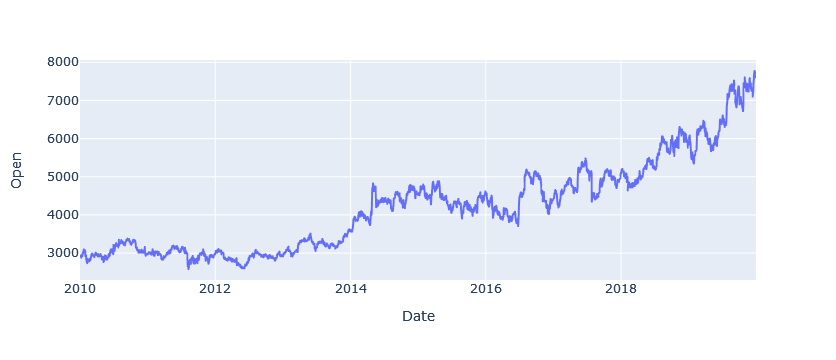

In [113]:
import plotly.express as px

azn = px.data.stocks()
fig = px.line(azn_df, x='Date', y="Open")
fig.show()

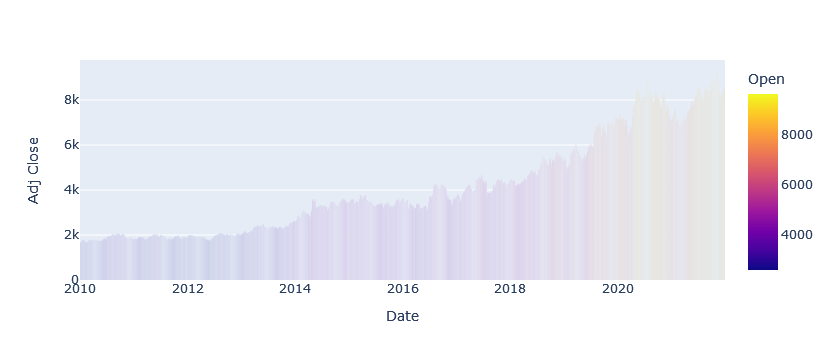

In [42]:
import plotly.express as px




In [ ]:
import plotly.graph_objects as go

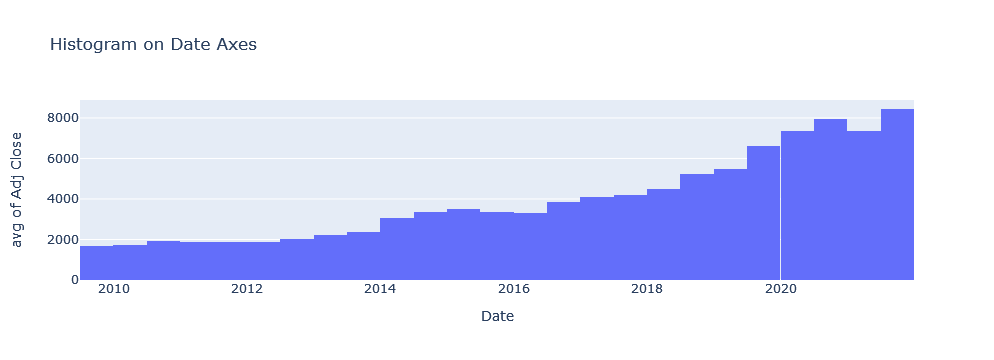

In [47]:
fig = px.histogram(azn_df, x="Date", y='Adj Close', histfunc="avg", title="Histogram on Date Axes")



fig.show()

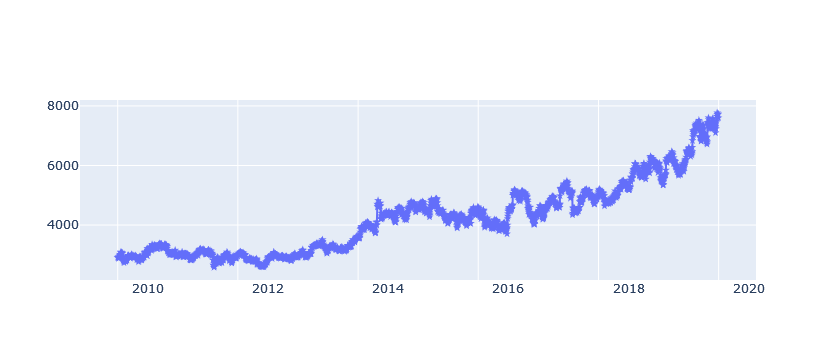

In [140]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    name="Raw Data",
    mode="markers+lines", x=azn_df["Date"], y=azn_df["Open"],
    marker_symbol="star"
))

fig.update_xaxes(showgrid=True, ticklabelmode="period")
fig.show()

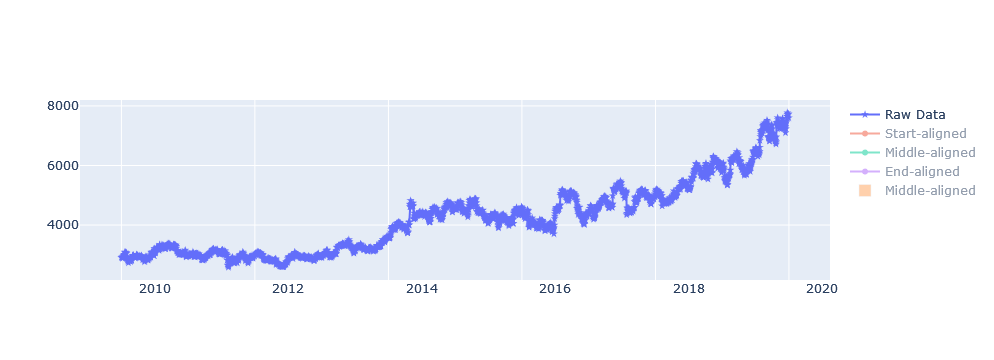

In [141]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    name="Raw Data",
    mode="markers+lines", x=azn_df["Date"], y=azn_df["Open"],
    marker_symbol="star"
))
fig.add_trace(go.Scatter(
    name="Start-aligned",
    mode="markers+lines",  x=azn_df["Date"], y=azn_df["Open"],
    xperiod="M1",
    xperiodalignment="start"
))
fig.add_trace(go.Scatter(
    name="Middle-aligned",
    mode="markers+lines",  x=azn_df["Date"], y=azn_df["Open"],
    xperiod="M1",
    xperiodalignment="middle"
))
fig.add_trace(go.Scatter(
    name="End-aligned",
    mode="markers+lines", x=azn_df["Date"], y=azn_df["Open"],
    xperiod="M1",
    xperiodalignment="end"
))
fig.add_trace(go.Bar(
    name="Middle-aligned",
    x=azn_df["Date"], y=azn_df["Open"],
    xperiod="M1",
    xperiodalignment="middle"
))
fig.update_xaxes(showgrid=True, ticklabelmode="period")
fig.show()

In [ ]:
azn_df1 = yf.download("AZN.L", start="2010-01-01", end="2020-01-01")[['Adj Close','Open', 'High', 'Low', 'Close', 'Volume']].round(2)

[*********************100%***********************]  1 of 1 completed


In [ ]:
azn_adj = azn_df[['Adj Close']]
azn_adj 

Adj Close
Date                 
2009-12-31    1681.68
2010-01-04    1699.30
2010-01-05    1679.94
2010-01-06    1661.16
2010-01-07    1681.68
...               ...
2019-12-23    7210.13
2019-12-24    7180.35
2019-12-27    7209.20
2019-12-30    7124.50
2019-12-31    7080.75

[2527 rows x 1 columns]

In [ ]:
forecast_out = 30

# Create column for target variable shifted 'n' days up
azn_adj['Prediction'] = azn_adj[['Adj Close']].shift(-forecast_out)

azn_adj

C:\Users\ABDULH~1\AppData\Local\Temp/ipykernel_15704/2421869246.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Adj Close  Prediction
Date                             
2009-12-31    1681.68     1666.49
2010-01-04    1699.30     1677.88
2010-01-05    1679.94     1670.39
2010-01-06    1661.16     1674.88
2010-01-07    1681.68     1676.68
...               ...         ...
2019-12-23    7210.13         NaN
2019-12-24    7180.35         NaN
2019-12-27    7209.20         NaN
2019-12-30    7124.50         NaN
2019-12-31    7080.75         NaN

[2527 rows x 2 columns]

In [ ]:
X = np.array(azn_adj.drop(['Prediction'], 1))
# Remove last 'n' rows
X = X[:-forecast_out]

print(X)

[[1681.68]
 [1699.3 ]
 [1679.94]
 ...
 [6875.97]
 [6809.88]
 [6746.58]]


C:\Users\ABDULH~1\AppData\Local\Temp/ipykernel_15704/189331241.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [ ]:
y = np.array(azn_adj['Prediction'])
# Remove last 'n' rows
y = y[:-forecast_out]

print(y)

[1666.49 1677.88 1670.39 ... 7209.2  7124.5  7080.75]


In [ ]:
train_size = int(X.shape[0]*0.7)

X_train = X[0:train_size]
y_train = y[0:train_size]

X_test = X[train_size:]
y_test = y[train_size:]

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_forecast = np.array(azn_adj.drop(['Prediction'],1))[-forecast_out:]
print(X_forecast)

[[6872.24]
 [6806.16]
 [6752.17]
 [6828.5 ]
 [6904.82]
 [7014.66]
 [7037.  ]
 [7008.14]
 [6981.15]
 [6942.06]
 [6908.55]
 [6826.63]
 [6807.09]
 [6728.9 ]
 [6755.89]
 [6722.38]
 [6744.72]
 [6800.57]
 [6771.72]
 [6717.73]
 [6882.48]
 [6934.61]
 [6962.53]
 [7105.88]
 [7267.84]
 [7210.13]
 [7180.35]
 [7209.2 ]
 [7124.5 ]
 [7080.75]]


C:\Users\ABDULH~1\AppData\Local\Temp/ipykernel_15704/2194105037.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

%matplotlib inline

# Import the models
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor
#from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [46]:
models = {}
models["Linear"] = LinearRegression()
models["Lasso"] = Lasso()
models["Ridge"] = Ridge()
models["ElasticNet"] = ElasticNet()
models["KNN"] = KNeighborsRegressor()
models["DecisionTree"] = DecisionTreeRegressor()
models["SVR"] = SVR(kernel='rbf', C=1e3, gamma='scale')
models["AdaBoost"] = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["RandomForest"] = RandomForestRegressor()
models["ExtraTrees"]= ExtraTreesRegressor()
models["BaggingRegressor"] = BaggingRegressor()

models["MLPRegressor"] = MLPRegressor(solver = 'lbfgs')

In [47]:
model_results = []  
model_names   = []
for model_name in models:
    model = models[model_name]
    # TimeSeries Cross validation
    tscv = TimeSeriesSplit(n_splits=7)
    
    cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')
    model_results.append(cv_results)
    model_names.append(model_name)
    print("{}: {}, ({})".format(model_name, round(cv_results.mean(), 6), round(cv_results.std(), 6)))

Linear: -0.662408, (0.926466)
Lasso: -0.662447, (0.926435)
Ridge: -0.662408, (0.926466)
ElasticNet: -0.662427, (0.926431)
KNN: -1.235666, (1.04151)
DecisionTree: -1.451741, (0.691096)
SVR: -1.964774, (1.919301)
AdaBoost: -1.678864, (2.005054)
GradientBoost: -0.92225, (0.410912)
RandomForest: -1.170702, (0.434202)
ExtraTrees: -1.190403, (0.482293)
BaggingRegressor: -1.197899, (0.452033)
MLPRegressor: -0.363715, (0.987119)


In [48]:
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)

LinearRegression()

In [49]:
predictions = lr.predict(X_test)

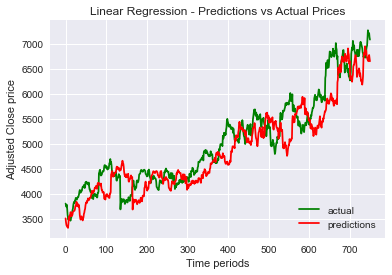

In [50]:
x_axis = np.array(range(0, predictions.shape[0]))
plt.plot(x_axis, y_test, color='g', label="actual")
plt.plot(x_axis, predictions, color='r', label="predictions")
plt.xlabel('Time periods')
plt.ylabel('Adjusted Close price')
plt.title('Linear Regression - Predictions vs Actual Prices')
plt.legend(loc='lower right')
plt.show()

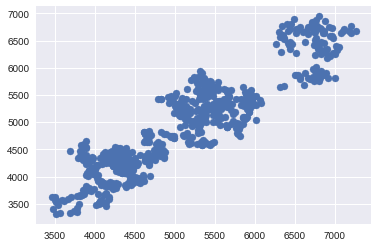

In [51]:
plt.scatter(y_test,predictions)

# obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(y_test, predictions, 1)



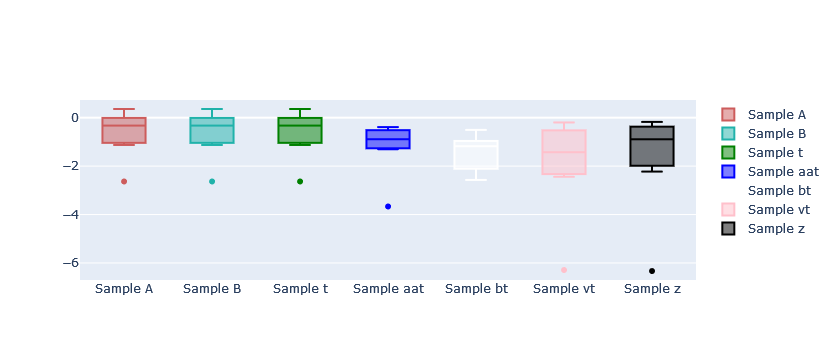

In [54]:
import plotly.graph_objects as go
import numpy as np

y0 = model_results[1]
y1 = model_results[2]
y2 = model_results[3]
y3 = model_results[4]
y4 = model_results[5]
y5 = model_results[6]
y6 = model_results[7]
y8 = model_results[8]



fig = go.Figure()
fig.add_trace(go.Box(y=y0, name='Sample A',
                marker_color = 'indianred'))
fig.add_trace(go.Box(y=y1, name = 'Sample B',
                marker_color = 'lightseagreen'))
fig.add_trace(go.Box(y=y2, name = 'Sample t',
                marker_color = 'green'))
fig.add_trace(go.Box(y=y3, name = 'Sample aat',
                marker_color = 'blue'))
fig.add_trace(go.Box(y=y4, name = 'Sample bt',
                marker_color = 'white'))
fig.add_trace(go.Box(y=y5, name = 'Sample vt',
                marker_color = 'pink'))
fig.add_trace(go.Box(y=y6, name = 'Sample z',
                marker_color = 'black'))


fig.show()

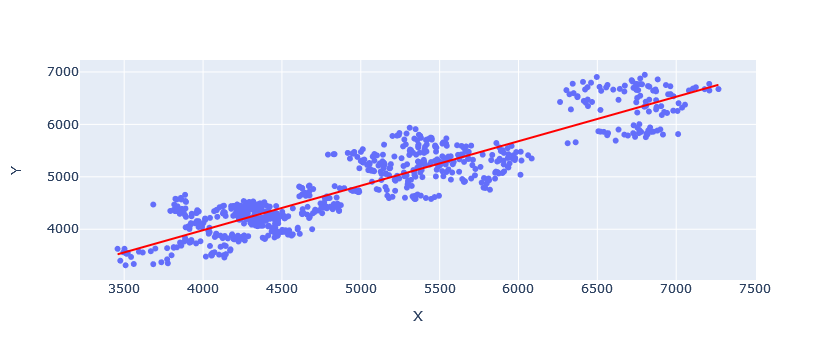

In [55]:
df = pd.DataFrame({'X': y_test, 'Y':predictions})

# figure with regression
# fig = px.scatter(df, x='X', y='Y', trendline="ols")
fig = px.scatter(df, x='X', y='Y', trendline="ols")

# make the regression line stand out
fig.data[1].line.color = 'red'

# plotly figure layout
fig.update_layout(xaxis_title = 'X', yaxis_title = 'Y')

fig.show()

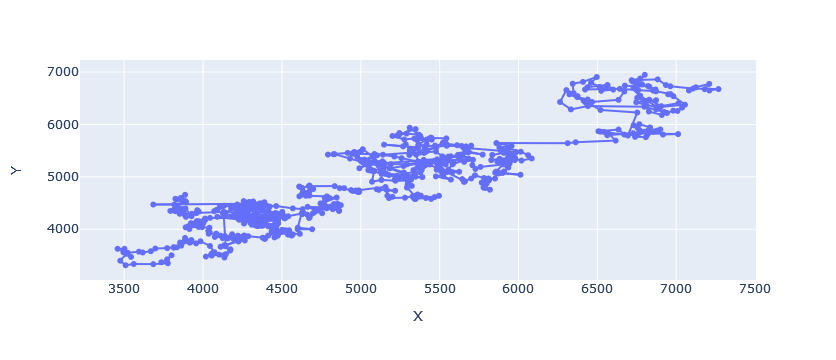

In [58]:
fig = px.line(df, x="X", y="Y"  , )
fig.show()

In [162]:
ddf

NameError: name 'ddf' is not defined

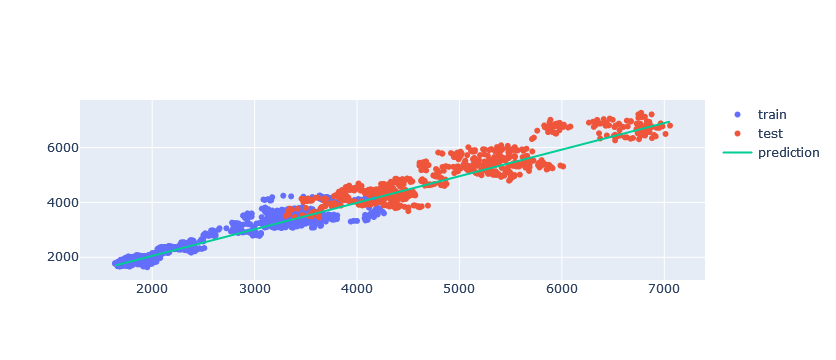

In [59]:
model = LinearRegression()
model.fit(X_train, y_train)

x_range = np.linspace(X.min(), X.max(), 100)
y_range = model.predict(x_range.reshape(-1, 1))


fig = go.Figure([
    go.Scatter(x=X_train.squeeze(), y=y_train, name='train', mode='markers'),
    go.Scatter(x=X_test.squeeze(), y=y_test, name='test', mode='markers'),
    go.Scatter(x=x_range, y=y_range, name='prediction')
])
fig.show()

In [184]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.svm import SVR

mesh_size = .02
margin = 0





# Condition the model on sepal width and length, predict the petal width
model = SVR(C=1.)
model.fit(X_train, y_train)

# Create a mesh grid on which we will run our model
x_min, x_max = X.sepal_width.min() - margin, X.sepal_width.max() + margin
y_min, y_max = X.sepal_length.min() - margin, X.sepal_length.max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

# Run model
pred = model.predict(np.c_[xx.ravel(), yy.ravel()])
pred = pred.reshape(xx.shape)

# Generate the plot
fig = px.scatter_3d(df, x='sepal_width', y='sepal_length', z='petal_width')
fig.update_traces(marker=dict(size=5))
fig.add_traces(go.Surface(x=xrange, y=yrange, z=pred, name='pred_surface'))
fig.show()

AttributeError: 'DataFrame' object has no attribute 'sepal_width'

In [60]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.svm import SVR

mesh_size = .02
margin = 0



X1 = azn_df[['Open', 'High']]
y1 = azn_df['Close']

# Condition the model on sepal width and length, predict the petal width
model = SVR(C=1.)
model.fit(X1, y1)

# Create a mesh grid on which we will run our model
x_min, x_max = X1.High.min() - margin, X1.High.max() + margin
y_min, y_max = X1.Open.min() - margin, X1.Open.max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

# Run model
pred = model.predict(np.c_[xx.ravel(), yy.ravel()])
pred = pred.reshape(xx.shape)

# Generate the plot
fig = px.scatter_3d(azn_df, x='High', y='Open', z='Close')
fig.update_traces(marker=dict(size=5))
fig.add_traces(go.Surface(x=xrange, y=yrange, z=pred, name='pred_surface'))
fig.show()

MemoryError: Unable to allocate 542. GiB for an array with shape (259425, 280494) and data type float64

In [61]:
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



# Split data into training and test splits
train_idx, test_idx = train_test_split(azn_df.index, test_size=.25, random_state=0)
df['split'] = 'train'
df.loc[test_idx, 'split'] = 'test'

X = df[['Open', 'High']]
y = df['Close']
X_train = df.loc[train_idx, ['Open', 'High']]
y_train = df.loc[train_idx, 'Close']
# Condition the model on sepal width and length, predict the petal width
model = LinearRegression()
model.fit(X_train, y_train)
df['prediction'] = model.predict(X)

fig = px.scatter(
    df, x='petal_width', y='prediction',
    marginal_x='histogram', marginal_y='histogram',
    color='split', trendline='ols'
)
fig.update_traces(histnorm='probability', selector={'type':'histogram'})
fig.add_shape(
    type="line", line=dict(dash='dash'),
    x0=y.min(), y0=y.min(),
    x1=y.max(), y1=y.max()
)

fig.show()

KeyError: '[1830, 1804, 997, 1821, 1525, 2421, 1652, 1651, 2246, 1832, 1264, 2420, 2125, 2483, 1354, 883, 1431, 1210, 2313, 1713, 1489, 1606, 1139, 1888, 1923, 1909, 1597, 2082, 2014, 2491, 2331, 2158, 944, 1187, 1599, 2007, 768, 914, 1231, 1188, 2522, 899, 2242, 2130, 1140, 1825, 2513, 1032, 2270, 1530, 1748, 1051, 2155, 1815, 1829, 982, 1872, 1474, 852, 1884, 1096, 2328, 2448, 1763, 1093, 1205, 1585, 1446, 1678, 2409, 882, 1495, 2482, 2379, 2487, 991, 900, 1240, 1490, 949, 1145, 995, 891, 2399, 933, 1042, 2332, 1325, 1544, 792, 1543, 988, 1977, 1226, 1275, 905, 1951, 758, 2419, 1719, 2170, 1612, 2079, 1270, 2315, 936, 1070, 789, 2347, 2351, 1055, 898, 1465, 1513, 1101, 1587, 2002, 1292, 2493, 2471, 1379, 2110, 1526, 831, 2184, 1203, 2318, 1894, 2001, 1261, 1781, 2434, 1319, 1564, 795, 1323, 1432, 1535, 2325, 1796, 913, 2287, 2424, 1183, 1009, 1082, 1077, 2124, 1322, 1675, 1809, 1043, 1081, 2067, 1626, 2261, 989, 1377, 1842, 916, 1785, 2277, 805, 1073, 1703, 2214, 1103, 1533, 1079, 2301, 2428, 897, 2031, 938, 2235, 1267, 1846, 1947, 1015, 794, 2305, 778, 1811, 953, 895, 2517, 841, 1217, 1380, 815, 2430, 1714, 2066, 1738, 2317, 1935, 2466, 1898, 1739, 2384, 1985, 977, 2402, 923, 1003, 1706, 1980, 1098, 2180, 2404, 1036, 1726, 1568, 1423, 1604, 2526, 1708, 1745, 1636, 1875, 2393, 1965, 1099, 2413, 1116, 1332, 2168, 1455, 2095, 2209, 757, 1018, 1806, 2101, 1511, 2258, 1493, 1436, 1056, 1450, 2100, 917, 842, 1013, 1813, 1482, 1122, 1712, 1570, 764, 2148, 2227, 890, 2284, 1539, 998, 776, 1735, 1110, 1327, 2432, 1025, 1698, 2281, 838, 2113, 1387, 2241, 2221, 1572, 2191, 1757, 987, 2174, 1405, 958, 1334, 1554, 1950, 1631, 1853, 1852, 1376, 2213, 2093, 2364, 1212, 2161, 2390, 1456, 1216, 2506, 1647, 828, 820, 1697, 836, 926, 1609, 1027, 1643, 1397, 1756, 1540, 1577, 1601, 2115, 1864, 2417, 2391, 1362, 1338, 909, 1592, 1839, 1855, 1995, 2233, 1824, 1505, 1580, 1695, 1358, 2134, 2355, 1347, 1017, 1460, 1451, 2087, 980, 2149, 1421, 1300, 2073, 2199, 1937, 1087, 1106, 1663, 1138, 766, 2103, 1959, 2205, 1078, 1467, 2061, 1097, 1926, 1109, 962, 2338, 2206, 1610, 2018, 1108, 1150, 1957, 1418, 1850, 1902, 1873, 921, 2266, 983, 2208, 1644, 1528, 1808, 964, 963, 1195, 1068, 1658, 2104, 2511, 1741, 1273, 1228, 1038, 2352, 1710, 1052, 1412, 1501, 1295, 1611, 2509, 1277, 2181, 2057, 1454, 2151, 2366, 2129, 1759, 2497, 880, 1729, 1984, 2249, 1504, 1045, 1998, 2374, 1069, 1473, 2319, 1716, 1244, 840, 1537, 986, 1655, 2422, 2495, 1127, 2230, 1000, 1845, 1213, 1464, 1170, 1285, 2142, 1059, 1573, 1618, 1359, 1880, 2165, 1780, 2375, 1459, 1870, 1076, 2368, 2321, 1010, 1700, 892, 1752, 1753, 1702, 1343, 2470] not in index'

In [9]:
import pandas as pd
from plotly.subplots import make_subplots
from statsmodels.tsa.seasonal import DecomposeResult, seasonal_decompose

import plotly.graph_objects as go

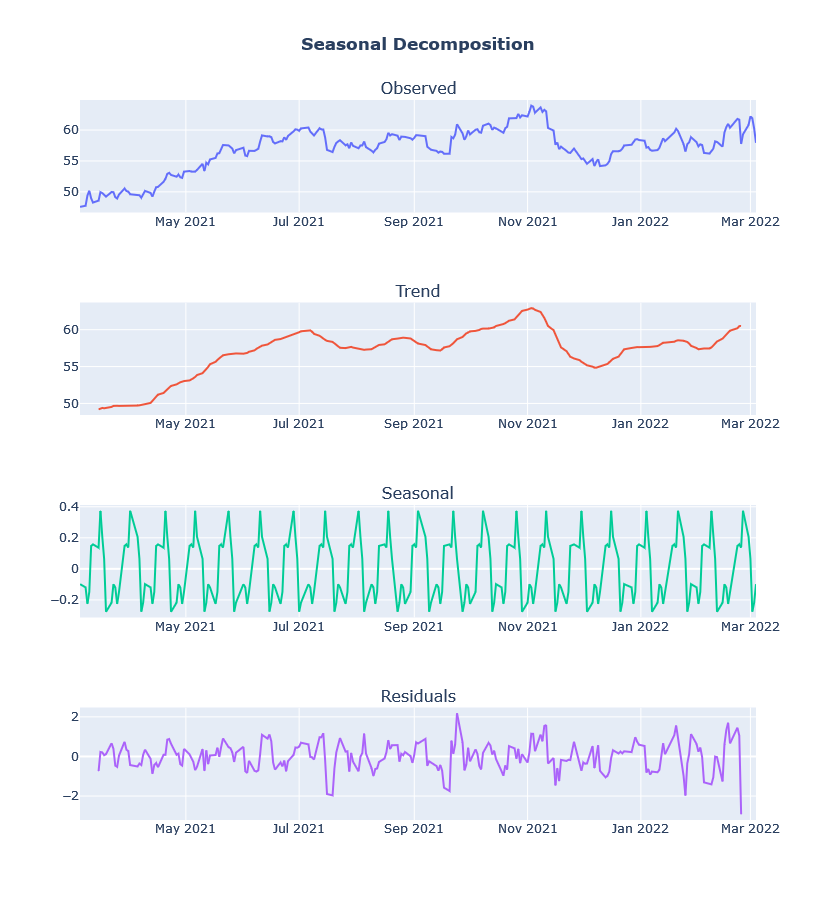

In [10]:


def plot_seasonal_decompose(result:DecomposeResult, dates:pd.Series=None, title:str="Seasonal Decomposition"):
    x_values = dates if dates is not None else np.arange(len(result.observed))
    return (
        make_subplots(
            rows=4,
            cols=1,
            subplot_titles=["Observed", "Trend", "Seasonal", "Residuals"],
        )
        .add_trace(
            go.Scatter(x=x_values, y=result.observed, mode="lines", name='Observed'),
            row=1,
            col=1,
        )
        .add_trace(
            go.Scatter(x=x_values, y=result.trend, mode="lines", name='Trend'),
            row=2,
            col=1,
        )
        .add_trace(
            go.Scatter(x=x_values, y=result.seasonal, mode="lines", name='Seasonal'),
            row=3,
            col=1,
        )
        .add_trace(
            go.Scatter(x=x_values, y=result.resid, mode="lines", name='Residual'),
            row=4,
            col=1,
        )
        .update_layout(
            height=900, title=f'<b>{title}</b>', margin={'t':100}, title_x=0.5, showlegend=False
        )
    )



import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
data = pd.read_csv("AZN.csv")
decomposition = seasonal_decompose(data['Open'], model='additive', period=12)
fig = plot_seasonal_decompose(decomposition, dates=data['Date'])
fig.show()

In [3]:
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import pandas as pd

In [48]:
dd=pd.read_csv('azn1.csv')
dd

Date  Adj Close    Open     High     Low   Close   Volume
0     2009-12-31    1681.68  2913.5  2929.00  2892.0  2910.5   606488
1     2010-01-04    1699.30  2912.0  2946.00  2912.0  2941.0  2091679
2     2010-01-05    1679.94  2936.0  2949.50  2901.0  2907.5  2869739
3     2010-01-06    1661.16  2909.0  2909.00  2850.5  2875.0  3136541
4     2010-01-07    1681.68  2879.0  2925.50  2879.0  2910.5  3748200
...          ...        ...     ...      ...     ...     ...      ...
2776  2020-12-23    6915.10  7307.0  7324.00  7196.0  7224.0  1588406
2777  2020-12-24    6914.14  7250.0  7326.00  7217.0  7223.0   744212
2778  2020-12-29    7142.92  7509.0  7578.24  7440.0  7462.0  2984828
2779  2020-12-30    7084.53  7570.0  7598.00  7400.0  7401.0  2290546
2780  2020-12-31    7010.82  7400.0  7409.00  7269.0  7324.0  1135354

[2781 rows x 7 columns]

In [49]:
import yfinance as yf

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.patches as mpatches
from matplotlib.dates import date2num, DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY

In [50]:
df1 = yf.download("AZN.L", start="2010-01-01", end="2021-01-01")[['Adj Close','Open', 'High', 'Low', 'Close', 'Volume']].round(2)

[*********************100%***********************]  1 of 1 completed


In [51]:
df1

Adj Close    Open     High     Low   Close   Volume
Date                                                           
2009-12-31    1681.68  2913.5  2929.00  2892.0  2910.5   606488
2010-01-04    1699.30  2912.0  2946.00  2912.0  2941.0  2091679
2010-01-05    1679.94  2936.0  2949.50  2901.0  2907.5  2869739
2010-01-06    1661.16  2909.0  2909.00  2850.5  2875.0  3136541
2010-01-07    1681.68  2879.0  2925.50  2879.0  2910.5  3748200
...               ...     ...      ...     ...     ...      ...
2020-12-23    6915.10  7307.0  7324.00  7196.0  7224.0  1588406
2020-12-24    6914.14  7250.0  7326.00  7217.0  7223.0   744212
2020-12-29    7142.92  7509.0  7578.24  7440.0  7462.0  2984828
2020-12-30    7084.53  7570.0  7598.00  7400.0  7401.0  2290546
2020-12-31    7010.82  7400.0  7409.00  7269.0  7324.0  1135354

[2781 rows x 6 columns]

In [57]:



df_close = df1['Close']
result = adfuller(df_close.dropna())

In [58]:
result

(-0.7179640776636877,
 0.8420414050399418,
 23,
 2757,
 {'1%': -3.4327241019050643,
  '5%': -2.862588908594463,
  '10%': -2.5673283673779763},
 31669.773232035037)

In [59]:
print(f"ADF test statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Critical thresholds:")

for key, value in result[4].items():
    print(f"\t{key}: {value}")

ADF test statistic: -0.7179640776636877
p-value: 0.8420414050399418
Critical thresholds:
	1%: -3.4327241019050643
	5%: -2.862588908594463
	10%: -2.5673283673779763


In [72]:
from scipy import stats
from scipy.stats import zscore

from pmdarima.arima.utils import ndiffs

import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox

from itertools import product
from tqdm.notebook import tqdm

import datetime
from datetime import date, timedelta

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

(-0.1322521275381381,
 0.9461298295963076,
 3,
 2523,
 {'1%': -3.432944516713937,
  '5%': -2.8626862482960957,
  '10%': -2.567380191580307},
 27740.62777004141)

ADF Test:
Null Hypothesis: Not Stationary
ADF Statistic: -0.717964
p-value: 0.842041
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


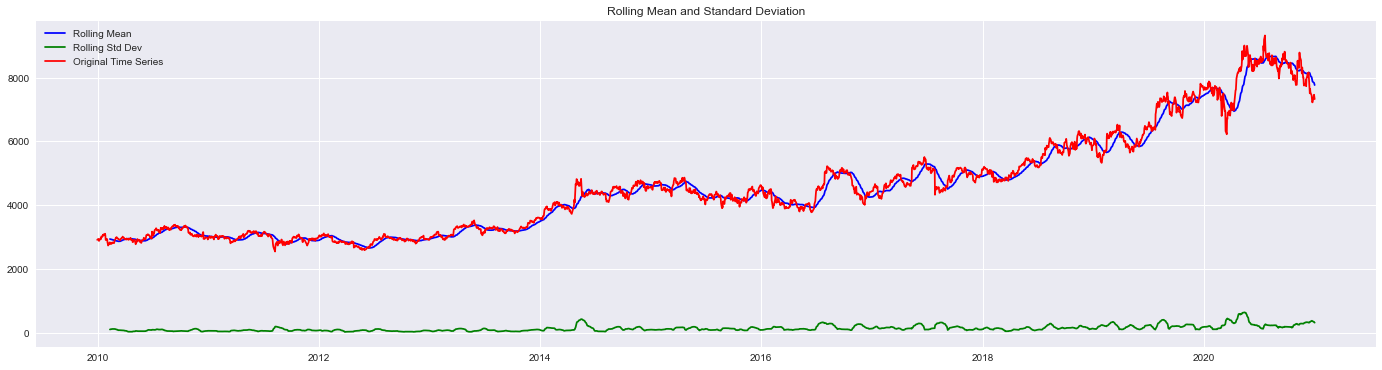

In [60]:
def stationarity_test(stock_close_price):
    # Calculating rolling mean and rolling standard deviation:
    rolling_mean = stock_close_price.rolling(30).mean()
    rolling_std_dev = stock_close_price.rolling(30).std()
  
    # Plotting the statistics:
    plt.figure(figsize=(24,6))
    plt.plot(rolling_mean, color='blue', label='Rolling Mean')
    plt.plot(rolling_std_dev, color='green', label = 'Rolling Std Dev')
    plt.plot(stock_close_price, color='red',label='Original Time Series')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    
    print("ADF Test:")
    adf_test = adfuller(stock_close_price,autolag='AIC')
    print('Null Hypothesis: Not Stationary')
    print('ADF Statistic: %f' % adf_test[0])
    print('p-value: %f' % adf_test[1])
    print('Critical Values:')
    for key, value in adf_test[4].items():
        print('\t%s: %.3f' % (key, value))

    
    
stationarity_test(df1['Close'])

In [69]:
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA

In [73]:
df_log = np.log(df_close)
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
# Build Model
ARIMA_model = ARIMA(train_data, order=(0,1,1))  
fitted = ARIMA_model.fit(disp=-1)  
print(fitted.summary())

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [ ]:
from statsmodels.tsa.arima_model import ARIMA